Data Cleaning and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
# Load dataset
file_path = "family_financial_and_transactions_data.xlsx"
data = pd.ExcelFile(file_path)

print("Available Sheets:", data.sheet_names)
sheet_name = "final_family_financial_and_tran"
family_data = data.parse(sheet_name)
print(family_data.head())


Available Sheets: ['final_family_financial_and_tran']
  Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

  

In [3]:
sheet_name = data.sheet_names[0]
family_data = data.parse(sheet_name)
print(f"Loaded Sheet: {sheet_name}")
print(family_data.head())


Loaded Sheet: final_family_financial_and_tran
  Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financi

In [4]:
family_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [5]:
family_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction Date,16306,2024-10-16 00:34:31.777259776,2024-10-01 00:00:00,2024-10-08 00:00:00,2024-10-16 00:00:00,2024-10-24 00:00:00,2024-10-31 00:00:00,NaN
Amount,16306.0,256.368534,10.03,134.82,256.055,379.24,499.91,141.153813
Income,16306.0,90340.503925,30851.0,59871.0,90142.0,119733.0,149871.0,34740.834136
Savings,16306.0,24473.998038,1037.0,11016.0,25504.0,37422.0,49217.0,14828.955695
Monthly Expenses,16306.0,3948.522384,1013.0,2582.0,3721.0,5450.0,6968.0,1689.987801
Loan Payments,16306.0,2529.978965,3.0,1390.0,2548.0,3724.0,4974.0,1384.105561
Credit Card Spending,16306.0,1782.880535,510.0,1221.0,1705.0,2422.0,2999.0,716.595101
Dependents,16306.0,3.201521,0.0,2.0,3.0,4.0,5.0,1.46888
Financial Goals Met (%),16306.0,59.418006,21.0,37.0,58.0,79.0,100.0,23.444304


In [6]:
family_data.isnull().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

 Spending Patterns Analysis

In [7]:
# Spending patterns
spending_per_member = family_data.groupby('Member ID')['Amount'].sum()
print(spending_per_member)

# Income vs Expenses correlation
family_data['Expenses'] = family_data.groupby('Family ID')['Amount'].sum()
correlation = family_data[['Income', 'Expenses']].corr()
print("Income vs Expenses Correlation:", correlation)


Member ID
FAM001_Member1    6521.20
FAM001_Member2    7084.83
FAM001_Member3    2119.41
FAM001_Member4    7463.46
FAM002_Member1    3082.90
                   ...   
FAM200_Member2    2103.85
FAM200_Member3    4671.33
FAM200_Member4    3739.52
FAM200_Member5    5408.28
FAM200_Member6    1837.73
Name: Amount, Length: 926, dtype: float64
Income vs Expenses Correlation:           Income  Expenses
Income       1.0       NaN
Expenses     NaN       NaN


Scoring Model Implementation

In [19]:
# Adjusted scoring logic
def calculate_financial_score(row):
    # Normalize ratios
    savings_ratio = row['Savings'] / max(row['Income'], 1)  # Avoid division by zero
    expense_ratio = row['Monthly Expenses'] / max(row['Income'], 1)
    loan_ratio = row['Loan Payments'] / max(row['Income'], 1)
    credit_spending_ratio = row['Credit Card Spending'] / max(row['Income'], 1)
    financial_goals = row['Financial Goals Met (%)'] / 100  # Convert to 0–1 scale

    # Calculate score with adjusted weights
    score = (
        (savings_ratio * 40) +  # Higher weight for savings
        (financial_goals * 20) -  # Positive impact from goal completion
        (expense_ratio * 15) -  # Deduct for higher expenses
        (loan_ratio * 15) -  # Deduct for loans
        (credit_spending_ratio * 10)  # Deduct for high credit card usage
    )

    # Ensure the score is between 0 and 100
    return max(0, min(100, score))

# Apply the scoring function
family_data['FinancialScore'] = family_data.apply(calculate_financial_score, axis=1)

# Display scores
print(family_data[['Family ID', 'FinancialScore']])


      Family ID  FinancialScore
0        FAM001       19.370363
1        FAM001       19.370363
2        FAM001       19.370363
3        FAM001       19.370363
4        FAM001       19.370363
...         ...             ...
16301    FAM200       55.006979
16302    FAM200       55.006979
16303    FAM200       55.006979
16304    FAM200       55.006979
16305    FAM200       55.006979

[16306 rows x 2 columns]


In [ ]:

for index, row in family_data.iterrows():
    print(f"Family ID: {row['Family ID']}")
    print(f"Savings Ratio: {row['Savings'] / max(row['Income'], 1):.2f}")
    print(f"Expense Ratio: {row['Monthly Expenses'] / max(row['Income'], 1):.2f}")
    print(f"Loan Ratio: {row['Loan Payments'] / max(row['Income'], 1):.2f}")
    print(f"Credit Spending Ratio: {row['Credit Card Spending'] / max(row['Income'], 1):.2f}")
    print(f"Financial Goals Met: {row['Financial Goals Met (%)'] / 100:.2f}")
    break  # Test with one row


Family ID: FAM001
Savings Ratio: 0.18
Expense Ratio: 0.05
Loan Ratio: 0.02
Credit Spending Ratio: 0.03
Financial Goals Met: 0.68


In [23]:
# Display calculated score for a specific row
test_row = family_data.loc[0]  # Example: First family in the dataset
test_score = calculate_financial_score(test_row)
print(f"Calculated Financial Score for {test_row['Family ID']}: {test_score:.2f}")


Calculated Financial Score for FAM001: 19.37


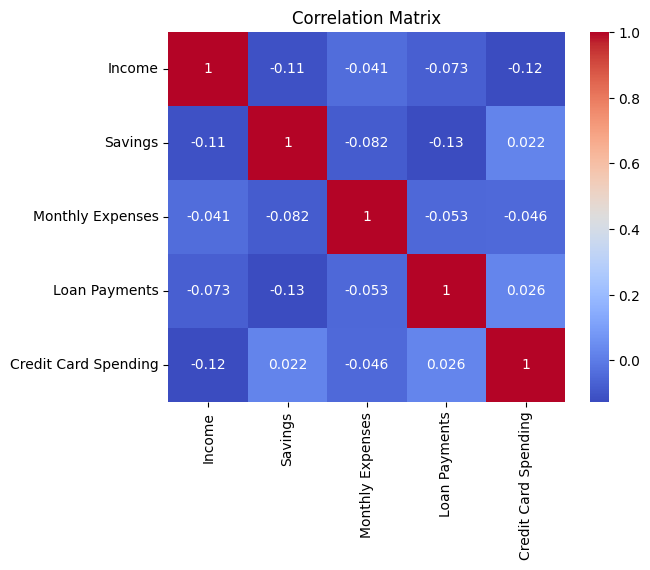

In [21]:
# Adjusted correlation matrix
correlation_data = family_data[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']]
correlation_matrix = correlation_data.corr()

# Plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Visualization

In [25]:
import plotly.express as px

fig = px.bar(family_data, x='Family ID', y='FinancialScore', title="Family Financial Scores")
fig.show()


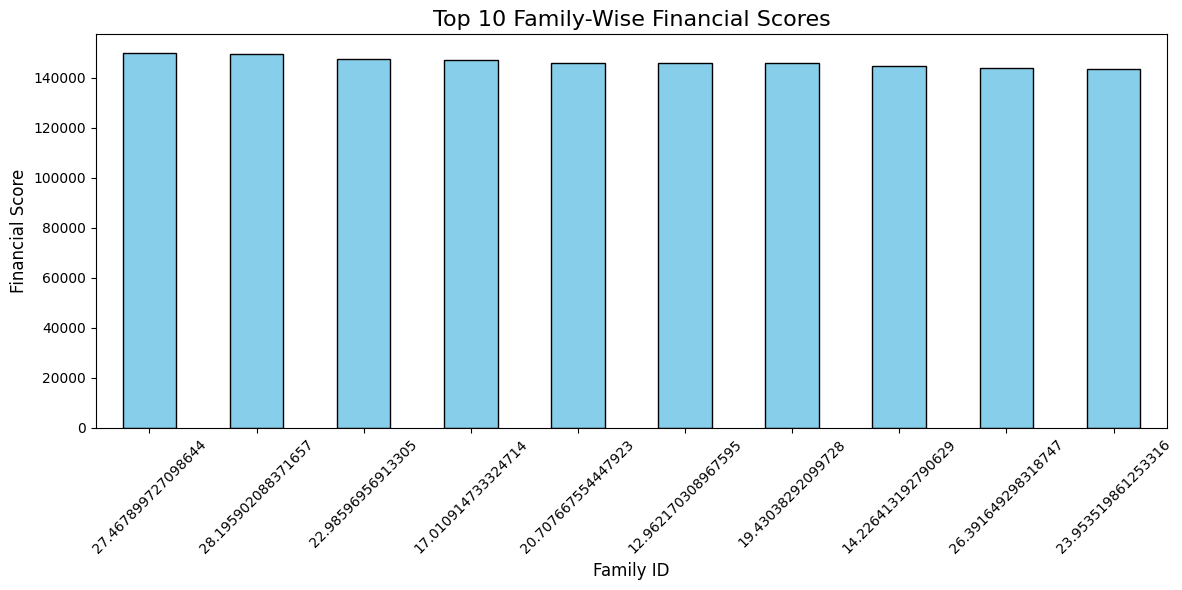

In [37]:
## Top 10 families by financial score
top_families = family_scores.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
top_families.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Family-Wise Financial Scores", fontsize=16)
plt.xlabel("Family ID", fontsize=12)
plt.ylabel("Financial Score", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.tight_layout()
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_15788\215563917.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




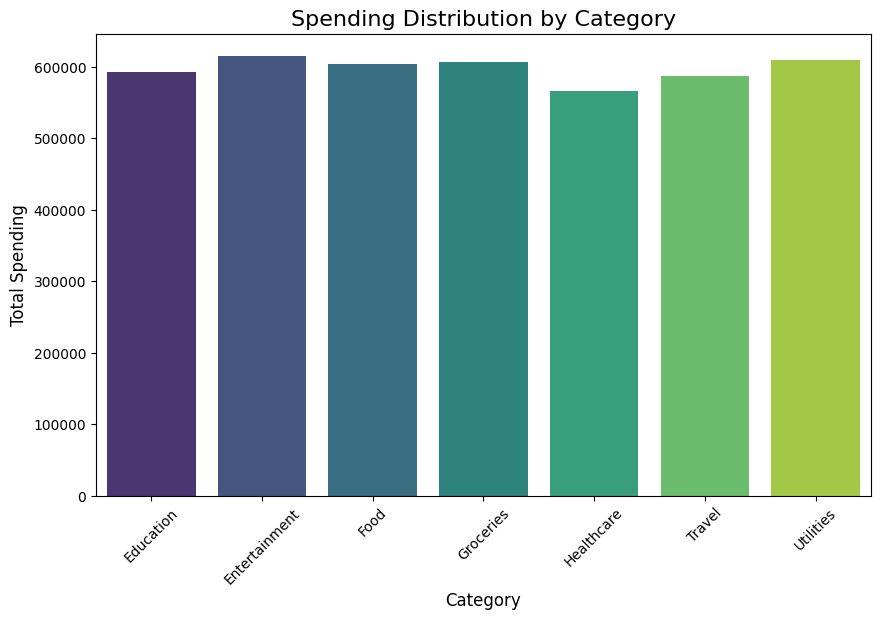

In [28]:
#Spending Distribution by Category
import seaborn as sns

# Total spending by category
spending_by_category = family_data.groupby('Category')['Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=spending_by_category, x='Category', y='Amount', palette='viridis')
plt.title("Spending Distribution by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Spending", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.show()


In [29]:
# Financial Goals Achievement vs Financial Score
import plotly.express as px

# Scatter plot for Financial Goals Met (%) vs Financial Score
fig = px.scatter(
    family_data,
    x='Financial Goals Met (%)',
    y='FinancialScore',
    size='Savings',
    color='Family ID',
    title="Financial Goals Met vs. Financial Score",
    labels={'Financial Goals Met (%)': "Goals Met (%)", 'FinancialScore': "Score"},
)
fig.show()


In [36]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

output_notebook()

# Prepare data
family_data['Savings vs Loan'] = family_data['Savings'] - family_data['Loan Payments']

# Create Bokeh figure
p = figure(
    title="Savings vs. Loan Payments",
    x_axis_label='Savings',
    y_axis_label='Loan Payments',
    width=800,  # Replace plot_width
    height=500,  # Replace plot_height
    tools="pan,wheel_zoom,box_zoom,reset",
)

# Add circles
p.circle(
    family_data['Savings'], family_data['Loan Payments'],
    size=8, color="navy", alpha=0.5,
    legend_label="Savings vs. Loan",
)


# Show plot
show(p)


Loading BokehJS ...